<a href="https://colab.research.google.com/github/Innocente0/summative_model-training_and_evaluation/blob/main/model_training_and_evaluation_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Heart Disease Prediction using ML & DL project**
Importes all the necessary Python libraries that I will be using throughout the project.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import zipfile
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.data import Dataset

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

##Load and Explore Data
Loading the UCI Heart Disease dataset directly from my GitHub. The dataset contains patient medical data shown below. This helped me confirm if the dataset has loaded successfully.

In [64]:
url = "https://raw.githubusercontent.com/Innocente0/summative_model-training_and_evaluation/refs/heads/main/heart.csv"
data = pd.read_csv(url)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In the cell below, I checked the data types of each column and verified whether any missing values are present. Calculated basic descriptive statistics such as mean, minimum, maximum, and standard deviation to see the range and variability of each feature.

In [65]:
#Data Exploration
print("Dataset Shape:", data.shape)
print("\nColumn Info:\n", data.info())
print("\nMissing values:\n", data.isnull().sum())
print("\nBasic statistics:\n", data.describe())

Dataset Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Column Info:
 None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca

##Visual Exploration
Visualized the dictibutions of patients with and without heart disease using a countplot to check class balance.

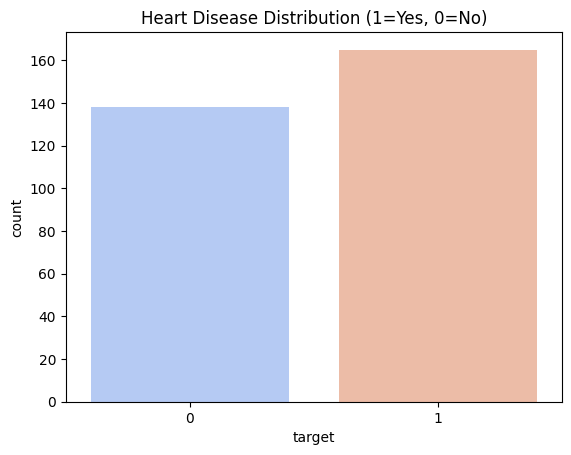

In [66]:
# Count of patients with and without heart disease
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title("Heart Disease Distribution (1=Yes, 0=No)")
plt.show()


 Used a correlation heatmap, which shows how strongly each feature relates to the target variable. This will help us understand which features influence prediction most.

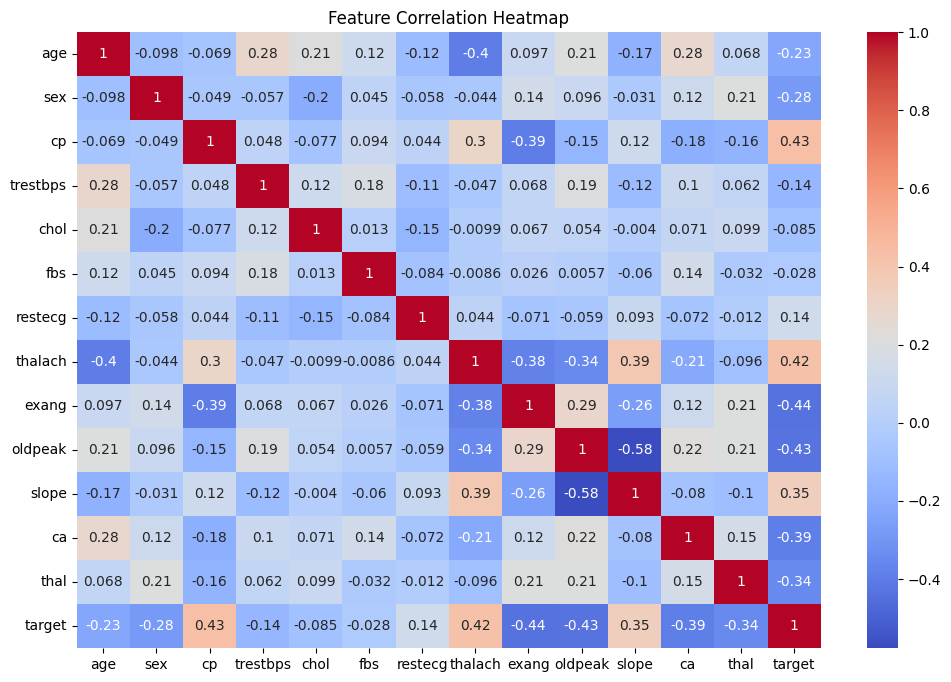

In [67]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

##Preprocessing and Feature Engineering
Separated the independent variables x from the target variables y. Standardize all features. Then split them into 80% training, 20% testing, so I can evaluate the model's performance on unseen data.


In [68]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

##Classical Machine Learning Models
Implemented four machine learning algorithms to serve as a perfomance baseline.



In [69]:
#Logistic Rgression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.8032786885245902


In [70]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.819672131147541


In [71]:
#Support Vector Machine
svm = SVC(kernel='rbf', probability=True, C=2)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.8032786885245902


In [72]:
#XGBoost
xgb = XGBClassifier(n_estimators=150, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.7704918032786885


**Evaluate ML Models**
The diagram below is to visualize how each model was trained on the training dtata and then tested on the test data to see or obtain accuracy scores.

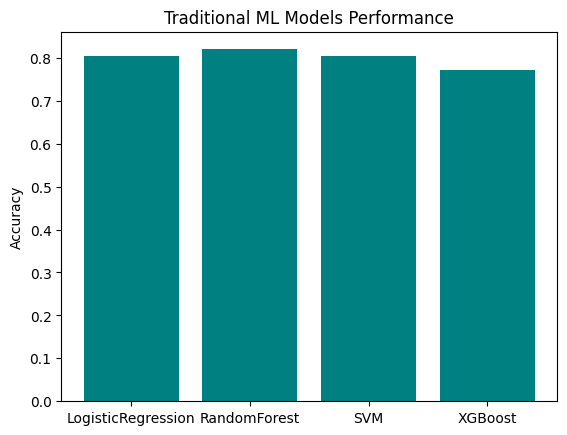

In [73]:
models = ['LogisticRegression','RandomForest','SVM','XGBoost']
accuracies = [lr_acc, rf_acc, svm_acc, xgb_acc]

plt.bar(models, accuracies, color='teal')
plt.ylabel("Accuracy")
plt.title("Traditional ML Models Performance")
plt.show()

##Deep Learning Model (Sequential API)


In [74]:
# Define Sequential model
seq_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

history_seq = seq_model.fit(
    X_train, y_train, epochs=100, batch_size=16,
    validation_split=0.2, callbacks=[es, lr_reduction], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5293 - loss: 0.6869 - val_accuracy: 0.7755 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6703 - loss: 0.6114 - val_accuracy: 0.8367 - val_loss: 0.5392 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7819 - loss: 0.5472 - val_accuracy: 0.8776 - val_loss: 0.4910 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8192 - loss: 0.5077 - val_accuracy: 0.8776 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8196 - loss: 0.4746 - val_accuracy: 0.8571 - val_loss: 0.4119 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8083 - loss: 0.4441 - val_accuracy: 0.8571 - val_loss: 0.3841 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8353 - loss: 0.4160 - 

After training the Sequential model, I plotted the learning curves to show how accuracy changes over epochs for both training and validation sets

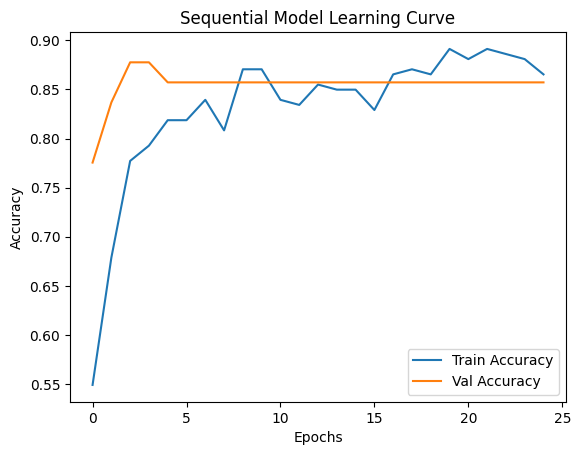

In [75]:
plt.plot(history_seq.history['accuracy'], label='Train Accuracy')
plt.plot(history_seq.history['val_accuracy'], label='Val Accuracy')
plt.title('Sequential Model Learning Curve')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

**Evaluate Sequential Model**
Computed accuracy to evaluate how many predictions were correct. This confirmed whether the deep learning modep outperforms the classical models or not.

In [76]:
seq_pred = (seq_model.predict(X_test) > 0.5).astype("int32")
seq_acc = accuracy_score(y_test, seq_pred)
print("Sequential NN Accuracy:", seq_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Sequential NN Accuracy: 0.7868852459016393


##Deep Learning Model(Functional API)
This model will help me in providing slightly better perfomance than the Sequential model beacuse of the flexibility on architecture design and regularization control.

In [77]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

func_model = Model(inputs, outputs)
func_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_func = func_model.fit(
    X_train, y_train, epochs=100, batch_size=16,
    validation_split=0.2, callbacks=[es, lr_reduction], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6133 - loss: 0.6947 - val_accuracy: 0.8163 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7161 - loss: 0.5865 - val_accuracy: 0.8776 - val_loss: 0.4978 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7587 - loss: 0.5455 - val_accuracy: 0.8776 - val_loss: 0.4529 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7650 - loss: 0.5191 - val_accuracy: 0.8776 - val_loss: 0.4159 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7897 - loss: 0.4762 - val_accuracy: 0.8980 - val_loss: 0.3822 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8476 - loss: 0.4314 - val_accuracy: 0.8980 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8021 - loss: 0.4431 - 

**Evaluate Functional Model**

This evaluation helped me provide insight whether deep learning outperforms traditional methods for this dataset.

In [78]:
func_pred = (func_model.predict(X_test) > 0.5).astype("int32")
func_acc = accuracy_score(y_test, func_pred)
print("Functional NN Accuracy:", func_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Functional NN Accuracy: 0.819672131147541


##Compare All Models
The codes below will help us compare all models (ML + DL) together in a single table and visualize their performance, and they will sort them from best model to worst.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,0.820,0.762,0.970,0.853,0.912
1,Functional NN,0.820,0.789,0.909,0.845,0.883
2,Logistic Regression,0.803,0.769,0.909,0.833,0.869
3,Support Vector Machine,0.787,0.778,0.848,0.812,0.887
4,Sequential NN,0.787,0.763,0.879,0.817,0.884
5,XGBoost,0.770,0.757,0.848,0.800,0.859


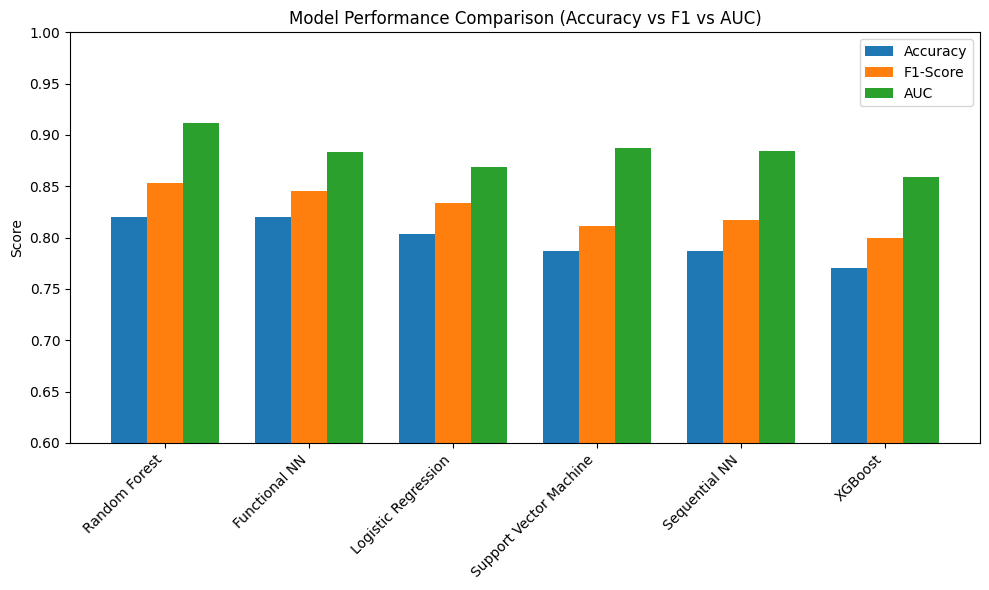

In [83]:
#Comparing All Models (Accuracy, Precision, Recall, F1, AUC)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Compute probabilities for all models
lr_probs   = lr.predict_proba(X_test)[:, 1]
rf_probs   = rf.predict_proba(X_test)[:, 1]
svm_probs  = svm.predict_proba(X_test)[:, 1]
xgb_probs  = xgb.predict_proba(X_test)[:, 1]
seq_probs  = seq_model.predict(X_test).ravel()
func_probs = func_model.predict(X_test).ravel()

#Convert probabilities to class predictions (threshold = 0.5)
lr_pred   = (lr_probs   > 0.5).astype(int)
rf_pred   = (rf_probs   > 0.5).astype(int)
svm_pred  = (svm_probs  > 0.5).astype(int)
xgb_pred  = (xgb_probs  > 0.5).astype(int)
seq_pred  = (seq_probs  > 0.5).astype(int)
func_pred = (func_probs > 0.5).astype(int)

#Collect metrics in a dictionary
results_metrics = {
    'Model':        [],
    'Accuracy':     [],
    'Precision':    [],
    'Recall':       [],
    'F1-Score':     [],
    'AUC':          []
}

def evaluate_model(name, y_true, y_pred, y_probs):
    results_metrics['Model'].append(name)
    results_metrics['Accuracy'].append(accuracy_score(y_true, y_pred))
    results_metrics['Precision'].append(precision_score(y_true, y_pred))
    results_metrics['Recall'].append(recall_score(y_true, y_pred))
    results_metrics['F1-Score'].append(f1_score(y_true, y_pred))
    results_metrics['AUC'].append(roc_auc_score(y_true, y_probs))

#Evaluate each model
evaluate_model('Logistic Regression', y_test, lr_pred,   lr_probs)
evaluate_model('Random Forest',        y_test, rf_pred,   rf_probs)
evaluate_model('Support Vector Machine', y_test, svm_pred,  svm_probs)
evaluate_model('XGBoost',              y_test, xgb_pred,  xgb_probs)
evaluate_model('Sequential NN',        y_test, seq_pred,  seq_probs)
evaluate_model('Functional NN',        y_test, func_pred, func_probs)

#Create a DataFrame and sort by Accuracy
metrics_df = pd.DataFrame(results_metrics)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("=== Model Performance Comparison ===")
display(metrics_df.round(3))

#Plot Accuracy, F1 and AUC for visual comparison
plt.figure(figsize=(10,6))
bar_width = 0.25
x = np.arange(len(metrics_df))

plt.bar(x - bar_width, metrics_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x,             metrics_df['F1-Score'], width=bar_width, label='F1-Score')
plt.bar(x + bar_width, metrics_df['AUC'],      width=bar_width, label='AUC')

plt.xticks(x, metrics_df['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.title('Model Performance Comparison (Accuracy vs F1 vs AUC)')
plt.legend()
plt.tight_layout()
plt.show()

##Confusion Matrix & ROC Curve
Performed a detailed model evaluation for the best performing model, which is Random Forest.
The Confusion Matrix shows true positives, true negatives, false positives, and false negatives, helping understand the types of errors made by the model.

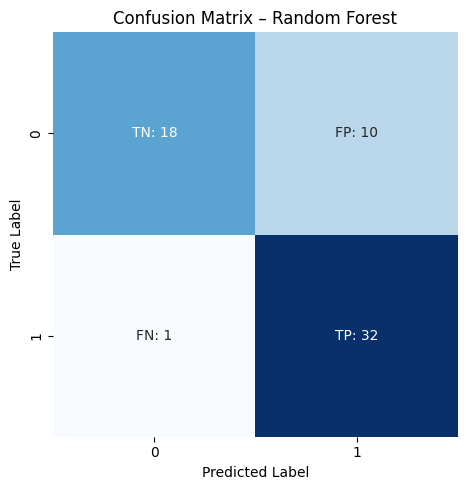

In [84]:
from sklearn.metrics import roc_curve, auc

#Generate predictions and probabilities
rf_pred  = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

#Random Forest confusion matrix
cm = confusion_matrix(y_test, rf_pred)
cm_labels = np.array([[f'TN: {cm[0,0]}', f'FP: {cm[0,1]}'],
                      [f'FN: {cm[1,0]}', f'TP: {cm[1,1]}']])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False, square=True)
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

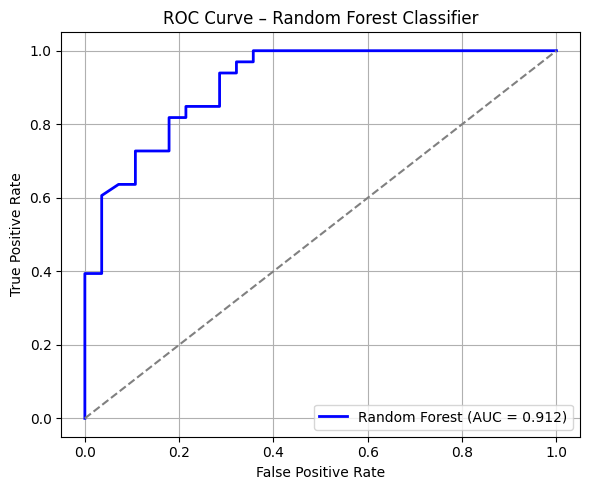

Random Forest AUC Score: 0.912


In [85]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Random Forest AUC Score: {rf_auc:.3f}")